# MDD(Maximum Drawdown) 최고점에서 최저점까지 손실 폭

In [ ]:
# rolling 함수 이해
# 시리즈.rolling(윈도우 크기, min_periods=1)[집계함수]

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()


In [10]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')
kospi.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-05 00:00:00+09:00,817.280029,825.429993,816.549988,824.099976,824.099976,408300
2004-01-06 00:00:00+09:00,831.260010,831.260010,819.530029,823.429993,823.429993,484100
2004-01-07 00:00:00+09:00,826.080017,831.070007,825.229980,827.070007,827.070007,404600
2004-01-08 00:00:00+09:00,831.099976,839.280029,824.150024,824.150024,824.150024,428800
2004-01-09 00:00:00+09:00,835.419983,849.500000,835.049988,845.270020,845.270020,543300


In [4]:
kospi.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
window = 252
peak = kospi['Adj Close'].rolling(window, min_periods = 1).max()
peak

Date
2004-01-05 00:00:00+09:00     824.099976
2004-01-06 00:00:00+09:00     824.099976
2004-01-07 00:00:00+09:00     827.070007
2004-01-08 00:00:00+09:00     827.070007
2004-01-09 00:00:00+09:00     845.270020
                                ...     
2023-01-16 00:00:00+09:00    2972.479980
2023-01-17 00:00:00+09:00    2972.479980
2023-01-18 00:00:00+09:00    2972.479980
2023-01-19 00:00:00+09:00    2972.479980
2023-01-20 00:00:00+09:00    2962.090088
Name: Adj Close, Length: 4708, dtype: float64

In [7]:
drawdown = kospi['Adj Close']/peak  - 1.0
drawdown


Date
2004-01-05 00:00:00+09:00    0.000000
2004-01-06 00:00:00+09:00   -0.000813
2004-01-07 00:00:00+09:00    0.000000
2004-01-08 00:00:00+09:00   -0.003531
2004-01-09 00:00:00+09:00    0.000000
                               ...   
2023-01-16 00:00:00+09:00   -0.192640
2023-01-17 00:00:00+09:00   -0.199527
2023-01-18 00:00:00+09:00   -0.203251
2023-01-19 00:00:00+09:00   -0.199207
2023-01-20 00:00:00+09:00   -0.191362
Name: Adj Close, Length: 4708, dtype: float64

In [11]:
max_dd = drawdown.rolling(window, min_periods=1).min()
max_dd


Date
2004-01-05 00:00:00+09:00    0.000000
2004-01-06 00:00:00+09:00   -0.000813
2004-01-07 00:00:00+09:00   -0.000813
2004-01-08 00:00:00+09:00   -0.003531
2004-01-09 00:00:00+09:00   -0.003531
                               ...   
2023-01-16 00:00:00+09:00   -0.313650
2023-01-17 00:00:00+09:00   -0.313650
2023-01-18 00:00:00+09:00   -0.313650
2023-01-19 00:00:00+09:00   -0.313650
2023-01-20 00:00:00+09:00   -0.313650
Name: Adj Close, Length: 4708, dtype: float64

In [13]:
plt.figure(figsize=(9, 7))

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<AxesSubplot: title={'center': 'KOSPI MDD'}, xlabel='Date'>

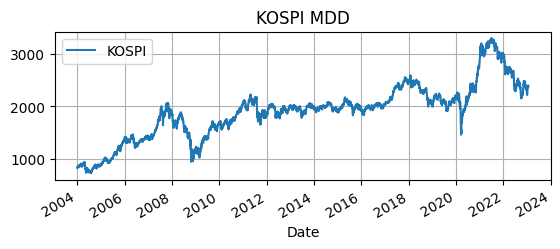

In [14]:
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)

<AxesSubplot: xlabel='Date'>

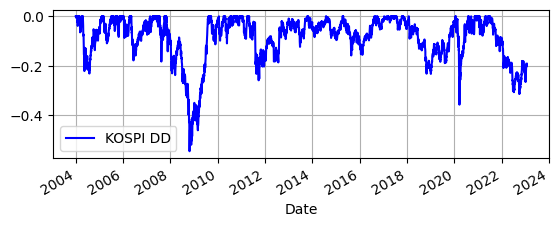

In [15]:
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid = True, legend=True)

<AxesSubplot: xlabel='Date'>

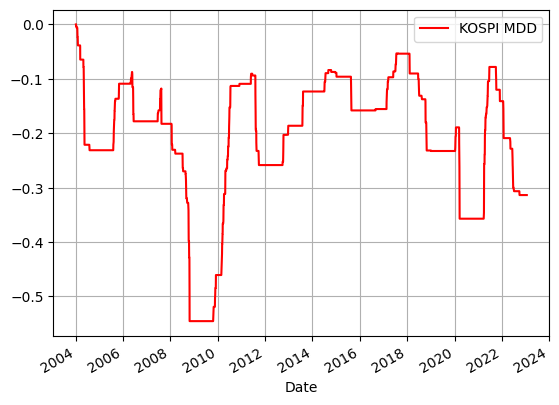

In [16]:
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)

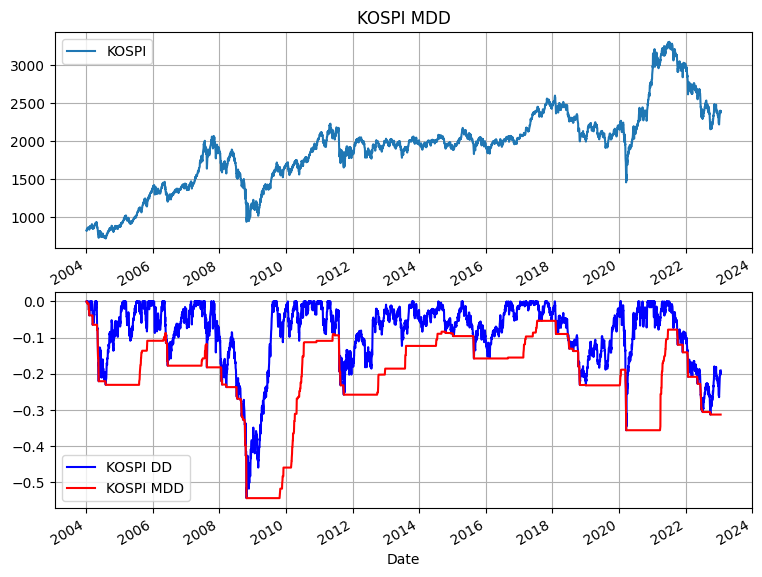

In [17]:
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid = True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [22]:
max_dd.min()


-0.5453665130144085

In [23]:
max_dd[max_dd == -0.5453665130144085]

Date
2008-10-24 00:00:00+09:00   -0.545367
2008-10-27 00:00:00+09:00   -0.545367
2008-10-28 00:00:00+09:00   -0.545367
2008-10-29 00:00:00+09:00   -0.545367
2008-10-30 00:00:00+09:00   -0.545367
                               ...   
2009-10-16 00:00:00+09:00   -0.545367
2009-10-19 00:00:00+09:00   -0.545367
2009-10-20 00:00:00+09:00   -0.545367
2009-10-21 00:00:00+09:00   -0.545367
2009-10-22 00:00:00+09:00   -0.545367
Name: Adj Close, Length: 252, dtype: float64